# Units and Quantities

## Objectives

- Use units
- Create functions that accept quantities as arguments
- Create new units

## Basics

How do we define a Quantity and which parts does it have?

In [1]:
import astropy.units as u

In [2]:
length = 26.2*u.m
print(length)

26.2 m


In [3]:
type(length)

astropy.units.quantity.Quantity

In [4]:
length.value

26.2

In [6]:
length.unit

Unit("m")

In [7]:
length.info

dtype = float64
unit = m
class = Quantity
n_bad = 0

Quantities can be converted to other units systems or factors by using `to()`

In [10]:
print(length.to(u.mm))

-22990000.0 mm


We can do arithmetic operations when the quantities have the compatible units:

In [9]:
distance_start=10*u.m
distance_end=23* u.km
length=distance_start-distance_end
print(length)

-22990.0 m


Quantities can also be combined, for example to measure speed

In [15]:
time = 15*u.second
speed=length/time
print(speed)

-1532.6666666666667 m / s


In [17]:
print(speed.decompose())
print(speed.si)

-1532.6666666666667 m / s
-1532.6666666666667 m / s



<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Unit conversions</h2>
</div>


<div class="panel-body">

<ol>
<li>Convert the speed in imperial units (miles/hour) using:
    <code>from astropy.units import imperial</code></li>
<li>Calculate whether a pint is more than half litre.
    <em>You can compare quantities as comparing variables.</em>
    Something strange? Check what deffinition of <a href="https://en.wikipedia.org/wiki/Pint">pint</a> astropy is using.</li>
<li>Does units work with areas? calculate the area of a rectangle of 3 km of side and 5 meter of width. Show them in $m^2$ and convert them to yards$^2$</li>
</ol>

</div>

</section>


In [46]:
from astropy.units import imperial as imp
print(speed.to(imp.mi/u.hour))

volume1=0.5*u.liter
volume2=1*imp.pint

print(volume1.si)
print(volume2.si)

side=3*u.km
width=5*u.m

area=side*width
print(area.decompose())
print(area.to(imp.yard**2))

-3428.4776902887143 mi / h
0.0005000000000000001 m3
0.00047317647364150407 m3
15000.0 m2
17939.8506945162 yd2


## Composed units

Many units are compositions of others, for example, one could create new combinationes for ease of use:

In [49]:
cms = u.cm/u.s
print(cms)
print(speed.to(cms))

cm / s
-153266.6666666667 cm / s


and others are already a composition:

In [50]:
(u.s**-1).compose()

[Unit("Hz"), Unit("Bq"), Unit("2.7027e-11 Ci")]

In [52]:
u.joule.compose()

[Unit("J"), Unit("1e+07 erg"), Unit("4.58742e+17 Ry"), Unit("6.24151e+18 eV")]

Sometime we get *no units* quantitites

In [57]:
nounits = 20*u.cm/(1*u.m)
nounits= nounits.decompose()

What happen if we add a number to this?

In [59]:
print(nounits.unit,type(nounits.unit))
nounits+3

 <class 'astropy.units.core.CompositeUnit'>


<Quantity 3.2>

## Equivalencies

Some conversions are not done by a conversion factor as between miles and kilometers, for example converting between wavelength and frequency.

In [60]:
(656.281*u.m).to(u.Hz)

UnitConversionError: 'm' (length) and 'Hz' (frequency) are not convertible

In [61]:
(656.281*u.nm).to(u.Hz,equivalencies=u.spectral())

<Quantity 4.56805024e+14 Hz>

Other built-in equivalencies are: 
 - `parallax()`
 - Doppler (`dopplr_radio`, `doppler_optical`, `doppler_relativistic`)
 - spectral flux density
 - brigthness temperature
 - temperature energy
 - and you can [build your own](http://astropy.readthedocs.org/en/stable/units/equivalencies.html#writing-new-equivalencies)

In [62]:
u.Hz.find_equivalent_units()

  Primary name | Unit definition | Aliases     
[
  Bq           | 1 / s           | becquerel    ,
  Ci           | 3.7e+10 / s     | curie        ,
  Hz           | 1 / s           | Hertz, hertz ,
]

## Printing the quantities

In [66]:
print("{0.value:0.03f}{0.unit:FITS}".format(speed.si))
print("{0.value:0.03f}{0.unit:latex_inline}".format(speed))

-1532.667m s-1
-1532.667$\mathrm{m\,s^{-1}}$


In [67]:
print(f"{speed.value}{speed.unit:FITS}")

-1532.6666666666667m s-1


## Arrays

Quantities can also be applied to arrays

In [68]:
length=44*u.m
time=u.Quantity(23,u.s)
speed=length/time
print(speed)

1.9130434782608696 m / s


In [71]:
length_list=[1,2,3]*u.m
import numpy as np
time_array=np.array([1,2,3])*u.s

print(length_list/time_array)

[1. 1. 1.] m / s


In [75]:
angle=u.Quantity(np.arange(360),u.deg)
print(angle[[0,-1]])
print(np.sin(angle[[0,-1]]))

[  0. 359.] deg
[ 0.         -0.01745241]


## Plotting quantities

To work nicely with matplotlib we need to do as follows:

In [76]:
from astropy.visualization import quantity_support
quantity_support()

%matplotlib notebook
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


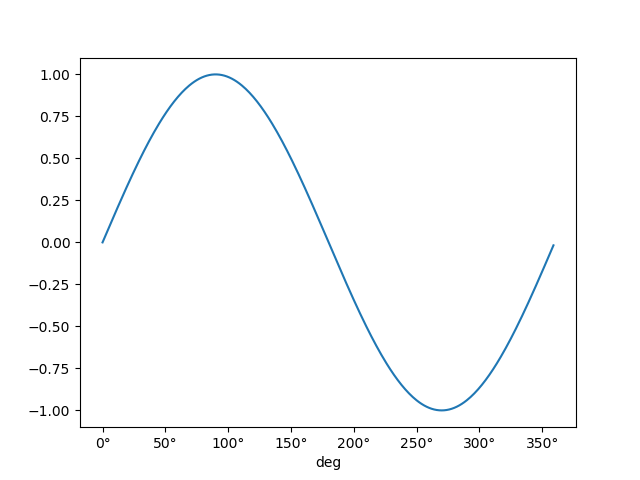

In [80]:
plt.plot(angle,np.sin(angle))

## Creating functions with quantities as units

We want to have functions that contain the information of the untis, and with them we can be sure that we will be always have the *right* result.

In [86]:
@u.quantity_input(mass=u.kg,speed=u.m/u.s) #this is so you have to put the units into the definition stated in @u.

def kinetic(mass,speed):
    return (mass*speed**2/2).to(u.joule)  #old way of doing this

#new way of doing it

@u.quantity_input #this is so you have to put the units into the definition stated in @u.

def kinetic(mass:u.kg,speed:u.m/u.s):
    return (mass*speed**2/2).to(u.joule)

In [82]:
kinetic(5,10)

TypeError: Argument 'mass' to function 'kinetic' has no 'unit' attribute. You may want to pass in an astropy Quantity instead.

In [87]:
kinetic(5*u.kg,10*cms)

<Quantity 0.025 J>


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Using `quantity_input`</h2>
</div>


<div class="panel-body">

<ol>
<li>Create a function that calculates potential energy where $g$ defaults to Earth value, but could be used for different planets. Test it for any of the $g$ values for any other <a href="http://www.physicsclassroom.com/class/circles/Lesson-3/The-Value-of-g&quot;">planets</a>.</li>
</ol>

</div>

</section>


In [134]:
#import all the packages

import numpy as np
import astropy.units as u
from astropy.visualization import quantity_support

#function that calculates potential energy for any planet

potential=0
mass=5
height=1
    
def potential_energy(g):
    potential=mass*u.kg*height*u.m*g*u.m*u.kg/u.s**2
    return potential.to(u.joule)



potential_energy(9.81)

#another way of writing it

#    @u.quantity_input
#    def potential(mass:u.kg,height:u.m,g:u.m/u.s**2=9.81*u.m*u.s**-2)->u.joule:
#        return(mass*g*height)


UnitConversionError: 'kg2 m2 / s2' and 'J' (energy) are not convertible

In [125]:

#Function that computes the kinetic energy of a body for a particular velocity

def kinetic_energy(v):
    kinetic=mass*u.kg*v**2*u.m/u.s
    return kinetic.to(u.joule,equivalencies=u.spectral())

kinetic_energy(10)

UnitConversionError: 'kg m / s' (momentum/impulse) and 'J' (energy) are not convertible

## Create your own units

Some times we want to create our own units:


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Area with units</h2>
</div>


<div class="panel-body">

<ol>
<li>Convert the area calculated before <code>rectangle_area</code> in <a href="https://en.wikipedia.org/wiki/Hectare">hectares</a> (1 hectare = 100 ares; 1 are = 100 $m^2$).</li>
</ol>

</div>

</section>
